# Femicides in Argentina

## Analizing the dataset

The data is located in the `registro-de-femicidios-2018-04-13.csv` CSV file. 


- **number**: _case number_ (continuous).
- **age**: _victim's age_ (continuous).
- **gender_identity**: _victim's gender identity_: mujer, transgenero, trans femenina, hombre, travesti, mujer lesbiana (string).
- **victim_type**: _if the victim is the real objective or a related person of the victim_: principal, vinculado (string).
- **province**: _where the femicide happened_: Buenos Aires, Chaco, Tucuman, Neuquen, Salta, Mendoza, Córdoba, Jujuy, Ciudad de Buenos Aires, Santa Fe, Corrientes, Chubut, Misiones, Santa Cruz, San Luis, Santiago del Estero, La Rioja, Catamarca, Formosa, Entre Rios, San Juan, Rio Negro, La Pampa,Tierra del Fuego (string).
- **murder_type**: _how the victim was killed. Could be one single value or a combination_: quemaduras, empalamiento, acuchillamiento, golpes, abuso sexual, asfixia, estrangulamiento, atropellamiento, disparo de bala, apuñalamiento, degollamiento, ahorcamiento, descuartizamiento, desbarrancamiento, otros (string).
- **date**: _when the femicide happened_ (date).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Set some styling for visualizations

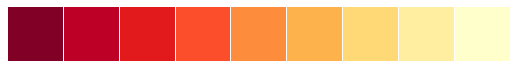

In [2]:
sns.set(rc={'figure.figsize': (14, 6)})
my_palette = ['#800026', '#bd0026', '#e31a1c', '#fc4e2a', '#fd8d3c', '#feb24c', '#fed976', '#ffeda0', '#ffffcc']
sns.set_palette(my_palette)
sns.palplot(sns.color_palette())
sns.set_context("talk")

### Loading the dataset

In [3]:
df = pd.read_table('registro-de-femicidios-2018-04-13.csv', sep=',', engine='python', skiprows=[0], names=['Case', 'Age', 'Gender identity', 'Victim type', 'Province', 'Murder type', 'Date'])
df.head()

,Case,Age,Gender identity,Victim type,Province,Murder type,Date
0,1108,11,MUJER,VINCULADO,Buenos Aires,QUEMADURAS -,2018-04-06
1,1108,31,MUJER,PRINCIPAL,Buenos Aires,QUEMADURAS -,2018-04-06
2,1107,22,MUJER,PRINCIPAL,Chaco,ASFIXIA - DEGOLLAMIENTO -,2018-04-15
3,1107,18,MUJER,PRINCIPAL,Chaco,ASFIXIA - DEGOLLAMIENTO -,2018-04-15
4,1106,21,MUJER,PRINCIPAL,Buenos Aires,ASFIXIA -,2018-02-28


In [4]:
# stripping out space and dash from 'Murder type' column
df['Murder type'] = df['Murder type'].str.rstrip(' -')

In [5]:
# checking data types
df.dtypes

Case                int64
Age                object
Gender identity    object
Victim type        object
Province           object
Murder type        object
Date               object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 7 columns):
Case               1075 non-null int64
Age                1075 non-null object
Gender identity    1075 non-null object
Victim type        1075 non-null object
Province           1075 non-null object
Murder type        1075 non-null object
Date               1075 non-null object
dtypes: int64(1), object(6)
memory usage: 58.9+ KB


## Searching for junk data

In [7]:
# checking unique values of 'Age' column
df.isnull().any()

Case               False
Age                False
Gender identity    False
Victim type        False
Province           False
Murder type        False
Date               False
dtype: bool

In [8]:
# checking unique values of 'Age' column
df['Age'].unique()

array(['11', '31', '22', '18', '21', '30', '47', '23', '26', '69', '44',
       '20', '59', '43', '32', '7', '51', '25', '14', '60', '54', '45',
       '27', '38', '64', '49', '19', '52', '50', '53', '4', '16',
       'Sin datos', '35', '34', '41', '39', '24', '17', '74', '42', '1',
       '75', '36', '2', '33', '37', '29', '62', '40', '13', '0', '65',
       '46', '80', '67', '55', '73', '66', '999', '10', '3', '15', '48',
       '56', '78', '12', '9', '8', '28', '70', '5', '90', '63', '58',
       '71', '57', '81', '85', '68', '61', '6', '86', '83'], dtype=object)

In [9]:
df['Age'].value_counts()

Sin datos    51
22           39
25           38
21           36
23           36
26           34
19           31
34           29
18           29
27           28
17           28
16           28
20           28
43           27
35           26
36           25
32           25
24           24
31           24
38           24
30           23
29           22
40           22
39           20
42           18
44           18
41           17
50           17
53           15
28           15
             ..
4             4
67            4
65            4
60            4
8             4
1             3
62            3
73            3
69            3
59            3
5             2
71            2
70            2
78            2
9             2
0             2
999           2
74            2
57            2
66            2
80            1
90            1
6             1
83            1
86            1
75            1
61            1
85            1
81            1
68            1
Name: Age, Length: 84, d

In [10]:
df.loc[df['Age'] == 'Sin datos', 'Age'].count()

51

In [11]:
df['Gender identity'].unique()

array(['MUJER', 'HOMBRE', 'TRANSGENERO', 'Sin datos', 'TRANS FEMENINA',
       'TRAVESTI', 'MUJER LESBIANA'], dtype=object)

In [12]:
df['Gender identity'].value_counts()

MUJER             957
Sin datos          49
HOMBRE             39
TRAVESTI           19
TRANS FEMENINA      7
TRANSGENERO         3
MUJER LESBIANA      1
Name: Gender identity, dtype: int64

In [13]:
df.loc[df['Gender identity'] == 'Sin datos', 'Gender identity'].count()

49

In [14]:
df['Province'].unique()

array(['Buenos Aires', 'Chaco', 'Tucuman', 'Neuquen', 'Salta', 'Mendoza',
       'Córdoba', 'Jujuy', 'Ciudad de Buenos Aires', 'Santa Fe',
       'Corrientes', 'Chubut', 'Misiones', 'Santa Cruz', 'San Luis',
       'Santiago del Estero', 'La Rioja', 'Catamarca', 'Formosa',
       'Entre Rios', 'San Juan', 'Sin datos', 'Rio Negro', 'La Pampa',
       'Tierra del Fuego'], dtype=object)

In [15]:
df['Victim type'].unique()

array(['VINCULADO', 'PRINCIPAL'], dtype=object)

In [16]:
df['Victim type'].value_counts()

PRINCIPAL    969
VINCULADO    106
Name: Victim type, dtype: int64

In [17]:
df.loc[df['Victim type'] == 'Sin datos', 'Victim type'].count()

0

In [18]:
df['Murder type'].unique()

array(['QUEMADURAS', 'ASFIXIA - DEGOLLAMIENTO', 'ASFIXIA',
       'DISPARO DE BALA', 'ACUCHILLAMIENTO', 'GOLPES - OTROS', 'GOLPES',
       'DEGOLLAMIENTO', 'ESTRANGULAMIENTO - ABUSO SEXUAL',
       'GOLPES - ESTRANGULAMIENTO', 'GOLPES - QUEMADURAS',
       'ESTRANGULAMIENTO - QUEMADURAS', 'GOLPES - DISPARO DE BALA',
       'OTROS', 'ESTRANGULAMIENTO', 'GOLPES - AHORCAMIENTO',
       'AHORCAMIENTO - ABUSO SEXUAL', 'ABUSO SEXUAL', 'Sin datos',
       'AHORCAMIENTO', 'GOLPES - ASFIXIA', 'APUÑALAMIENTO',
       'DESCUARTIZAMIENTO', 'GOLPES - ESTRANGULAMIENTO - ABUSO SEXUAL',
       'ENVENENAMIENTO', 'ACUCHILLAMIENTO - QUEMADURAS',
       'ASFIXIA - QUEMADURAS', 'ACUCHILLAMIENTO - DISPARO DE BALA',
       'GOLPES - DESCUARTIZAMIENTO', 'ATROPELLAMIENTO',
       'ACUCHILLAMIENTO - GOLPES', 'GOLPES - ABUSO SEXUAL',
       'DESBARRANCAMIENTO', 'DISPARO DE BALA - GOLPES', 'Empalamiento',
       'QUEMADURAS - ACUCHILLAMIENTO', 'GOLPES - ACUCHILLAMIENTO',
       'DISPARO DE BALA - DISPARO DE BALA'

In [19]:
df['Murder type'].value_counts()

DISPARO DE BALA                                             236
ACUCHILLAMIENTO                                             192
GOLPES                                                      118
Sin datos                                                   110
ESTRANGULAMIENTO                                             52
QUEMADURAS                                                   49
APUÑALAMIENTO                                                49
ASFIXIA                                                      26
DEGOLLAMIENTO                                                22
AHORCAMIENTO                                                 18
GOLPES - ACUCHILLAMIENTO                                     18
OTROS                                                        18
OTROS - GOLPES                                               12
ESTRANGULAMIENTO - GOLPES                                    10
OTROS - ESTRANGULAMIENTO                                      8
ESTRANGULAMIENTO - ASFIXIA              

In [20]:
df.loc[df['Murder type'] == 'Sin datos', 'Murder type'].count()

110

In [21]:
df['Date'].unique()

array(['2018-04-06', '2018-04-15', '2018-02-28', '2018-03-25',
       '2016-09-14', '2018-04-02', '2018-03-30', '2018-01-14',
       '2018-03-29', '2018-03-26', '2013-02-10', '2018-02-05',
       '2018-03-08', '2018-03-02', '2018-02-20', '2018-02-25',
       '2018-02-13', '2018-02-10', '2018-02-14', '2018-02-08',
       '2018-02-09', '2018-02-04', '2018-02-22', '2017-12-28',
       '2018-02-01', '2017-05-05', '2018-01-28', '2018-01-24',
       '2018-01-22', '2018-01-15', '2017-03-07', '2018-01-02',
       '2017-12-17', '2017-12-24', '2017-12-29', '2018-01-04',
       '2017-11-21', '2018-12-29', '2017-12-25', '2017-09-12',
       '2018-01-06', '2017-12-13', '2018-01-11', '2017-12-18',
       '2018-01-10', '2018-01-08', '2017-09-23', '2017-12-19',
       '2017-12-07', '2017-12-08', '2014-11-16', '2017-09-20',
       '2017-12-09', 'Sin datos', '2017-12-02', '2017-12-11',
       '2017-11-27', '2017-12-06', '2015-02-09', '2017-12-01',
       '2014-03-28', '2015-11-15', '2017-11-25', '2017-1

In [22]:
df['Date'].value_counts()

Sin datos     36
2014-05-10     8
2017-12-29     5
2016-09-13     5
2017-02-05     5
2017-02-20     5
2016-12-25     5
2015-02-23     4
2017-12-08     4
2016-11-07     4
2014-09-21     4
2013-10-26     4
2016-02-07     4
2016-10-23     4
2014-02-19     4
2017-03-22     3
2017-10-24     3
2016-08-14     3
2017-10-06     3
2016-04-24     3
2014-11-23     3
2015-06-03     3
2016-12-02     3
2017-04-02     3
2016-03-17     3
2014-08-14     3
2015-08-25     3
2017-02-12     3
2013-02-11     3
2016-03-13     3
              ..
2016-03-28     1
2017-03-27     1
2015-07-06     1
2016-08-13     1
2015-04-29     1
2017-06-01     1
2017-06-08     1
2013-01-16     1
2016-04-11     1
2015-12-25     1
2017-10-20     1
2016-07-04     1
2016-02-06     1
2016-07-25     1
2017-06-19     1
2014-12-20     1
2014-11-30     1
2016-09-19     1
2016-04-27     1
2017-04-29     1
2016-09-16     1
2017-05-06     1
2013-02-09     1
2016-09-27     1
2015-05-15     1
2014-12-24     1
2014-08-10     1
2017-11-25    

## Converting to NaN

In [23]:
df.replace({
    'Age': { 'Sin datos': np.nan, '999': np.nan },
    'Gender identity': { 'Sin datos': np.nan },
    'Province': { 'Sin datos': np.nan },
    'Murder type': { 'Sin datos': np.nan },
    'Date': { 'Sin datos': np.nan }
}, inplace=True)

In [24]:
df.isnull().any()

Case               False
Age                 True
Gender identity     True
Victim type        False
Province            True
Murder type         True
Date                True
dtype: bool

In [25]:
df.shape

(1075, 7)

In [26]:
df[df.isnull().any(axis=1)].shape

(220, 7)

## Fillna and removing junk data

In [27]:
# droping out NaN values from 'Gender identity' column
df = df.dropna(subset=['Gender identity'])

In [28]:
# Converting 'Age' column to float, so I can ask for mean value
df['Age'] = df['Age'].astype(float)

In [29]:
df['Age'].mean()

32.118246687054025

In [30]:
# saving the rounded value of the mean into age_mean
age_mean = round(df['Age'].mean())
age_mean

32

In [31]:
# Filling NaN values from 'Age' column with the mean age
df['Age'] = df['Age'].fillna(value=age_mean)

In [32]:
# converting 'Age' column to integer
df['Age'] = df['Age'].astype(int)

In [33]:
# dropping any other NaN values in the dataframe
df.dropna(axis=0, how='any', inplace=True)

In [34]:
df.isnull().any()

Case               False
Age                False
Gender identity    False
Victim type        False
Province           False
Murder type        False
Date               False
dtype: bool

In [35]:
df

,Case,Age,Gender identity,Victim type,Province,Murder type,Date
0,1108,11,MUJER,VINCULADO,Buenos Aires,QUEMADURAS,2018-04-06
1,1108,31,MUJER,PRINCIPAL,Buenos Aires,QUEMADURAS,2018-04-06
2,1107,22,MUJER,PRINCIPAL,Chaco,ASFIXIA - DEGOLLAMIENTO,2018-04-15
3,1107,18,MUJER,PRINCIPAL,Chaco,ASFIXIA - DEGOLLAMIENTO,2018-04-15
4,1106,21,MUJER,PRINCIPAL,Buenos Aires,ASFIXIA,2018-02-28
5,1105,30,MUJER,PRINCIPAL,Buenos Aires,DISPARO DE BALA,2018-03-25
6,1104,47,MUJER,PRINCIPAL,Buenos Aires,ACUCHILLAMIENTO,2016-09-14
7,1103,23,MUJER,PRINCIPAL,Buenos Aires,ACUCHILLAMIENTO,2018-04-02
8,1102,26,MUJER,PRINCIPAL,Tucuman,GOLPES - OTROS,2018-03-30
9,1101,47,MUJER,PRINCIPAL,Neuquen,ACUCHILLAMIENTO,2018-01-14


In [36]:
df.dtypes

Case                int64
Age                 int64
Gender identity    object
Victim type        object
Province           object
Murder type        object
Date               object
dtype: object

## Converting types

In [37]:
df['Age'] = pd.to_numeric(df['Age'])

In [38]:
df['Date'] = pd.to_datetime(df['Date'])

In [39]:
df['Gender identity'] = df['Gender identity'].str.capitalize()

In [40]:
df['Victim type'] = df['Victim type'].str.capitalize()

In [41]:
df['Murder type'] = df['Murder type'].str.title()

In [42]:
df.head()

,Case,Age,Gender identity,Victim type,Province,Murder type,Date
0,1108,11,Mujer,Vinculado,Buenos Aires,Quemaduras,2018-04-06
1,1108,31,Mujer,Principal,Buenos Aires,Quemaduras,2018-04-06
2,1107,22,Mujer,Principal,Chaco,Asfixia - Degollamiento,2018-04-15
3,1107,18,Mujer,Principal,Chaco,Asfixia - Degollamiento,2018-04-15
4,1106,21,Mujer,Principal,Buenos Aires,Asfixia,2018-02-28


In [43]:
df.dtypes

Case                        int64
Age                         int64
Gender identity            object
Victim type                object
Province                   object
Murder type                object
Date               datetime64[ns]
dtype: object

## Adding some new info (from the current info)

In [44]:
df['Day of week'] = df['Date'].dt.weekday_name
df.head()

,Case,Age,Gender identity,Victim type,Province,Murder type,Date,Day of week
0,1108,11,Mujer,Vinculado,Buenos Aires,Quemaduras,2018-04-06,Friday
1,1108,31,Mujer,Principal,Buenos Aires,Quemaduras,2018-04-06,Friday
2,1107,22,Mujer,Principal,Chaco,Asfixia - Degollamiento,2018-04-15,Sunday
3,1107,18,Mujer,Principal,Chaco,Asfixia - Degollamiento,2018-04-15,Sunday
4,1106,21,Mujer,Principal,Buenos Aires,Asfixia,2018-02-28,Wednesday


In [45]:
bins = [0, 13, 21, 35, 45, 65, 100]
age_ranges = pd.cut(df['Age'], bins, labels=['0-13', '13-21', '21-35', '35-45', '45-65', '65+'])

df['Age range'] = age_ranges
df.head()

,Case,Age,Gender identity,Victim type,Province,Murder type,Date,Day of week,Age range
0,1108,11,Mujer,Vinculado,Buenos Aires,Quemaduras,2018-04-06,Friday,0-13
1,1108,31,Mujer,Principal,Buenos Aires,Quemaduras,2018-04-06,Friday,21-35
2,1107,22,Mujer,Principal,Chaco,Asfixia - Degollamiento,2018-04-15,Sunday,21-35
3,1107,18,Mujer,Principal,Chaco,Asfixia - Degollamiento,2018-04-15,Sunday,13-21
4,1106,21,Mujer,Principal,Buenos Aires,Asfixia,2018-02-28,Wednesday,13-21


## Converting some to categorycal data

In [46]:
df['Victim type'].nbytes

7096

In [47]:
df['Victim type'] = df['Victim type'].astype('category')

In [48]:
df['Victim type'].nbytes

903

In [49]:
df['Gender identity'].nbytes

7096

In [50]:
df['Gender identity'] = df['Gender identity'].astype('category')

In [51]:
df['Gender identity'].nbytes

935

In [52]:
df['Age range'].nbytes

935

In [53]:
df['Age range'] = df['Age range'].astype('category')

In [54]:
df['Age range'].nbytes

935

In [55]:
df['Day of week'].nbytes

7096

In [56]:
df['Day of week'] = df['Day of week'].astype('category')

In [57]:
df['Day of week'].nbytes

943

In [58]:
df.head()

,Case,Age,Gender identity,Victim type,Province,Murder type,Date,Day of week,Age range
0,1108,11,Mujer,Vinculado,Buenos Aires,Quemaduras,2018-04-06,Friday,0-13
1,1108,31,Mujer,Principal,Buenos Aires,Quemaduras,2018-04-06,Friday,21-35
2,1107,22,Mujer,Principal,Chaco,Asfixia - Degollamiento,2018-04-15,Sunday,21-35
3,1107,18,Mujer,Principal,Chaco,Asfixia - Degollamiento,2018-04-15,Sunday,13-21
4,1106,21,Mujer,Principal,Buenos Aires,Asfixia,2018-02-28,Wednesday,13-21


## Some info

In [59]:
df.dtypes

Case                        int64
Age                         int64
Gender identity          category
Victim type              category
Province                   object
Murder type                object
Date               datetime64[ns]
Day of week              category
Age range                category
dtype: object

In [60]:
df.shape

(887, 9)

## Visualization

### 1 variable

#### Cases per Gender identity

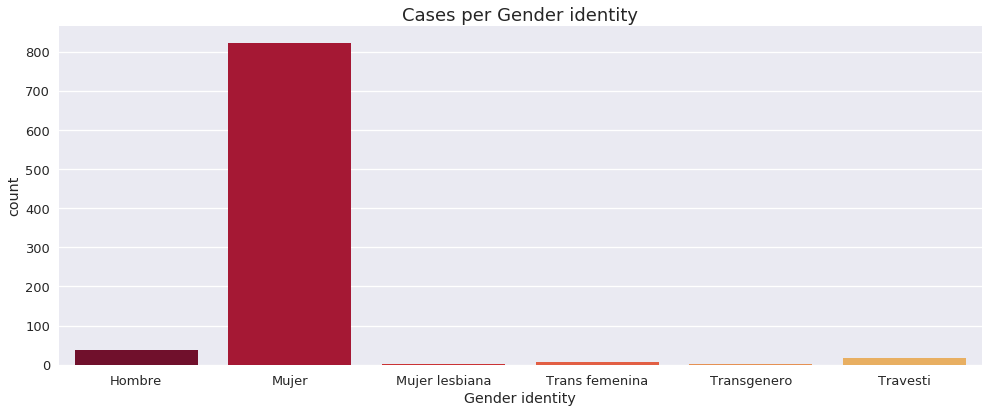

In [61]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.countplot(x='Gender identity', data=df)
plt.title('Cases per Gender identity', fontsize=18)

fig.tight_layout()

#### Cases per Age

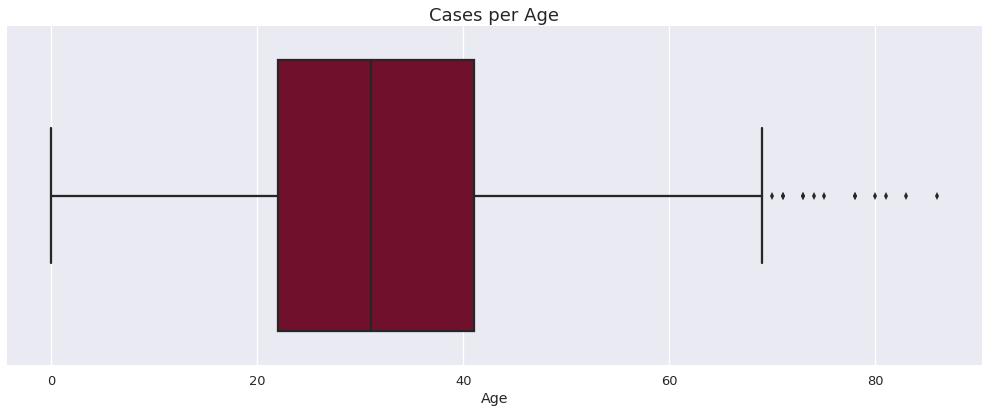

In [62]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.boxplot(data=df, x='Age')
plt.title('Cases per Age', fontsize=18)

fig.tight_layout()

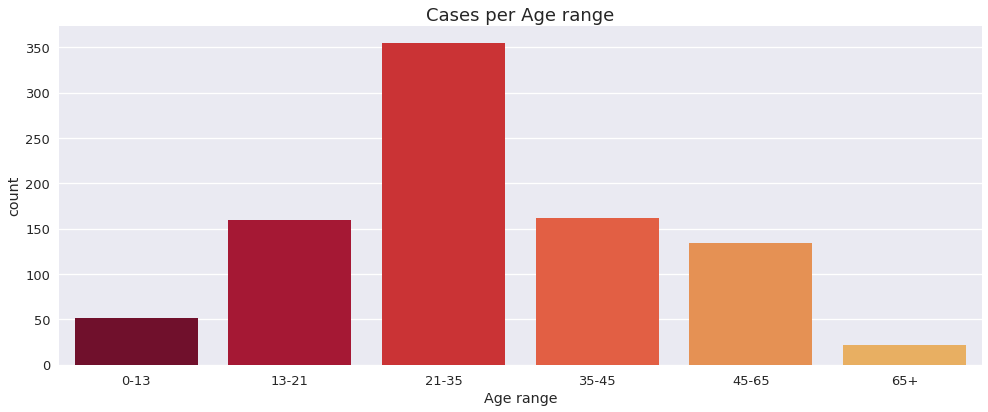

In [63]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.countplot(x='Age range', data=df)
plt.title('Cases per Age range', fontsize=18)

fig.tight_layout()

#### Cases per Victim type

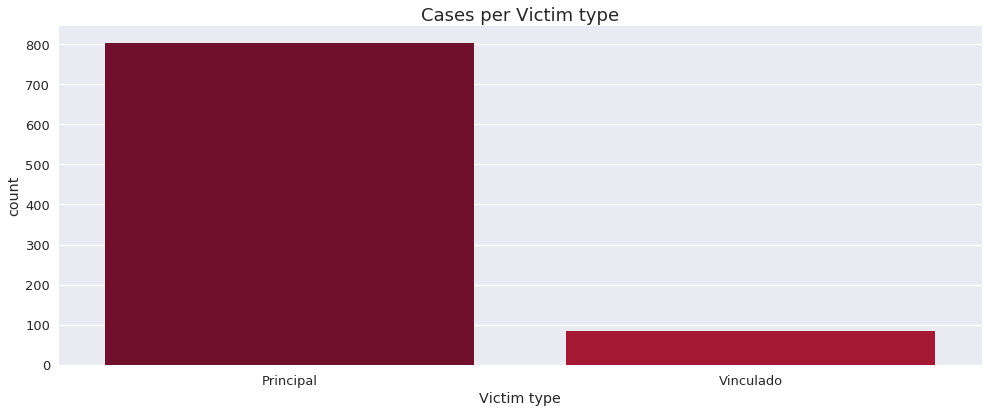

In [64]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.countplot(x='Victim type', data=df)
plt.title('Cases per Victim type', fontsize=18)

fig.tight_layout()

#### Cases per year / month / day

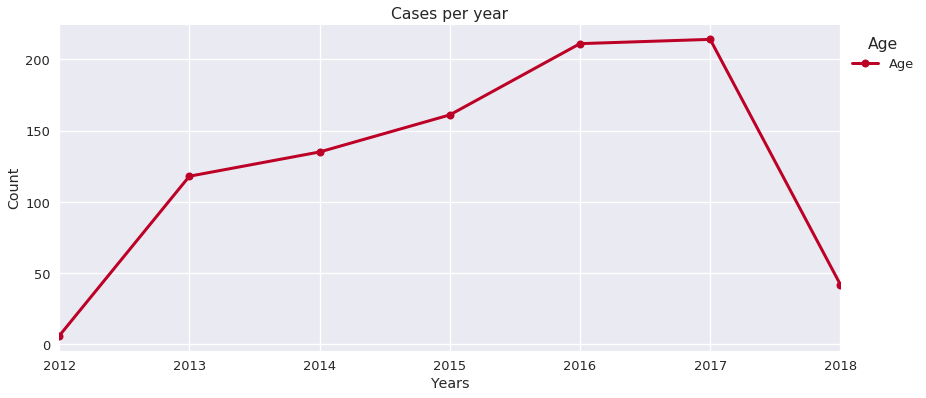

In [65]:
ax = df.groupby(df['Date'].dt.year)['Age'].count().plot(color='#bd0026', linewidth=3, marker='o', markersize=8)

# Creates labels
ax.set_xlabel('Years')
ax.set_ylabel('Count')
# Sets the plot title
ax.set_title("Cases per year")
# Shows the legends of the plots
ax.legend(bbox_to_anchor=(1, 1), loc=2, title='Age')

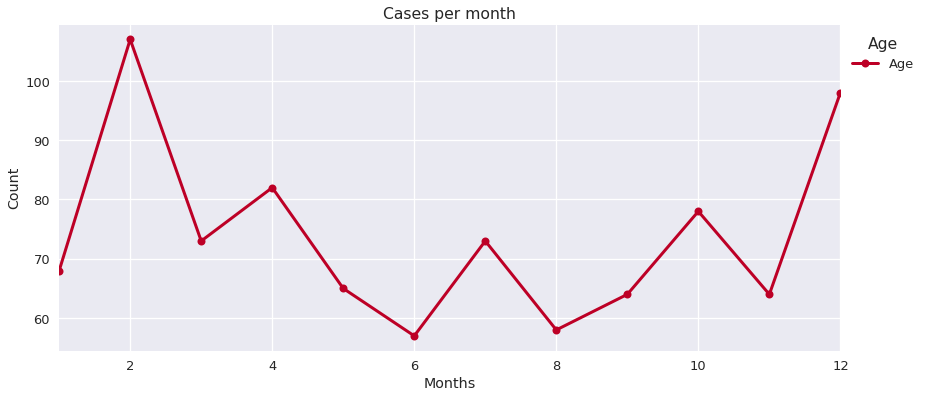

In [66]:
ax = df.groupby(df['Date'].dt.month)['Age'].count().plot(color='#bd0026', linewidth=3, marker='o', markersize=8)

# Creates labels
ax.set_xlabel('Months')
ax.set_ylabel('Count')
# Sets the plot title
ax.set_title("Cases per month")
# Shows the legends of the plots
ax.legend(bbox_to_anchor=(1, 1), loc=2, title='Age')

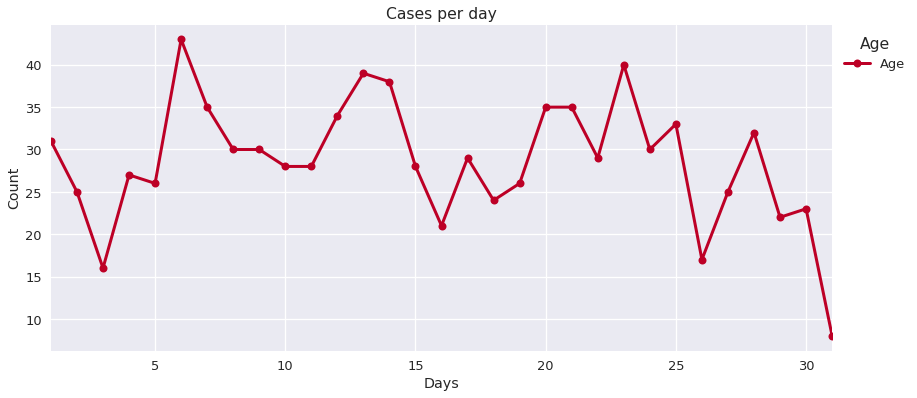

In [67]:
ax = df.groupby(df['Date'].dt.day)['Age'].count().plot(color='#bd0026', linewidth=3, marker='o', markersize=8)

# Creates labels
ax.set_xlabel('Days')
ax.set_ylabel('Count')
# Sets the plot title
ax.set_title("Cases per day")
# Shows the legends of the plots
ax.legend(bbox_to_anchor=(1, 1), loc=2, title='Age')

#### Cases per Day of week

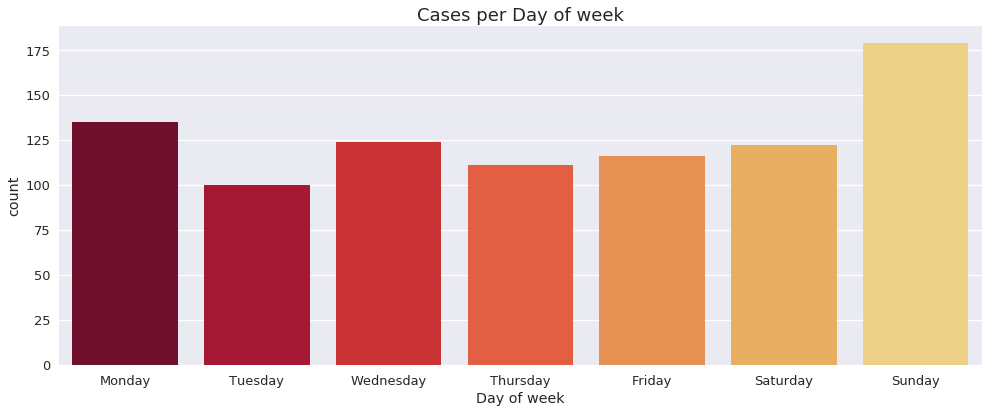

In [68]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.countplot(x='Day of week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Cases per Day of week', fontsize=18)

fig.tight_layout()

### 2 variables

#### Cases by age per Province

[Text(0.5,27.9,'Age range'),
 Text(0.5,1,'Amount of cases by Age range per Province')]

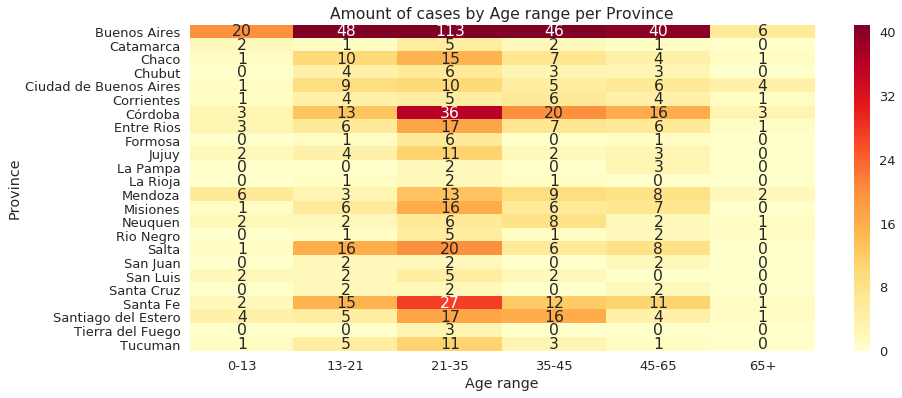

In [69]:
# Grouping by province and age range and switching a row to columns to get the count
A_P = df.groupby(['Province', 'Age range'])[['Age range']].count().unstack()
# filling NaN values with 0
A_P = A_P.fillna(0)
#Setting the x-axis labels
x_ticks = ['0-13', '13-21', '21-35', '35-45', '45-65', '65+']
# building the heatmap
ax_A_P = sns.heatmap(A_P,cmap="YlOrRd", annot=True, fmt='.0f', robust=True, xticklabels=x_ticks)
# setting some labels
ax_A_P.set(title='Amount of cases by Age range per Province', xlabel='Age range')

#### Amount by Gender per Province

[Text(0.5,27.9,'Gender identity'),
 Text(0.5,1,'Amount of cases by Gender per Province')]

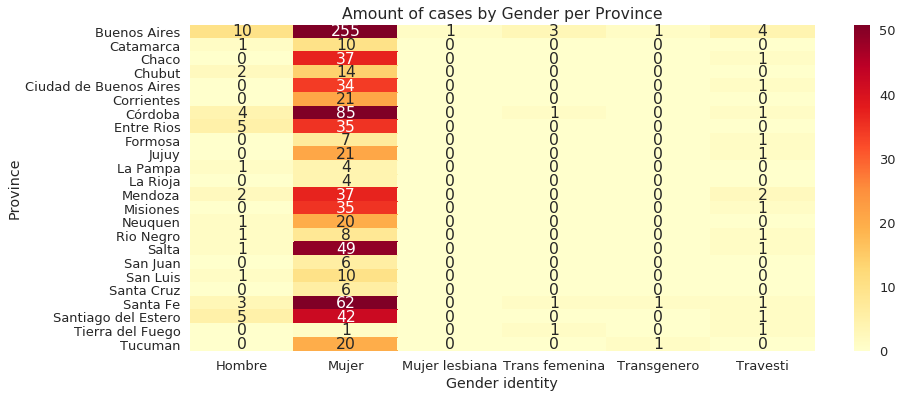

In [70]:
G_P = df.groupby(['Province', 'Gender identity'])[['Gender identity']].count().unstack()
G_P = G_P.fillna(0)
x_ticks = ['Hombre', 'Mujer', 'Mujer lesbiana', 'Trans femenina', 'Transgenero', 'Travesti']
ax_G_P = sns.heatmap(G_P, cmap="YlOrRd", annot=True, fmt='.0f', robust=True, xticklabels=x_ticks)
ax_G_P.set(title='Amount of cases by Gender per Province', xlabel='Gender identity')

#### Amount of Victim types per Day of Week

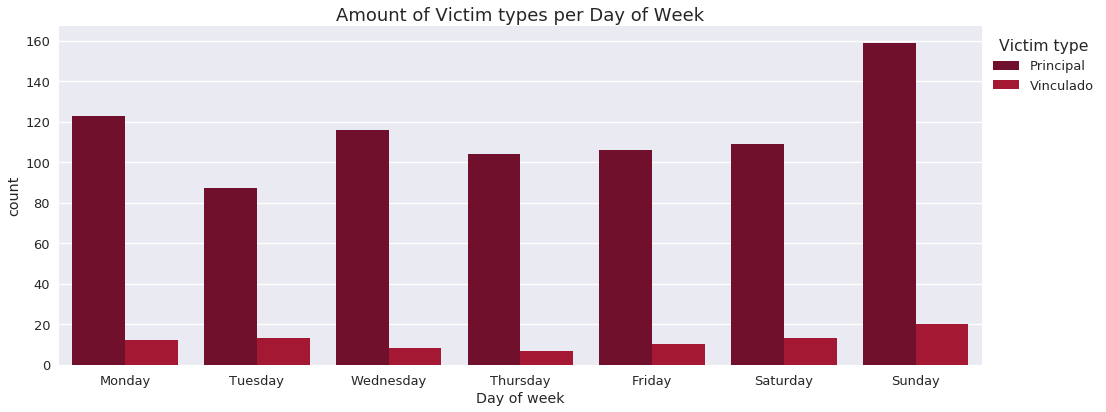

In [71]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.countplot(x='Day of week', hue='Victim type', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Amount of Victim types per Day of Week', fontsize=18)
ax.legend(bbox_to_anchor=(1, 1), loc=2, title='Victim type')

fig.tight_layout()

#### Victim types per Age range

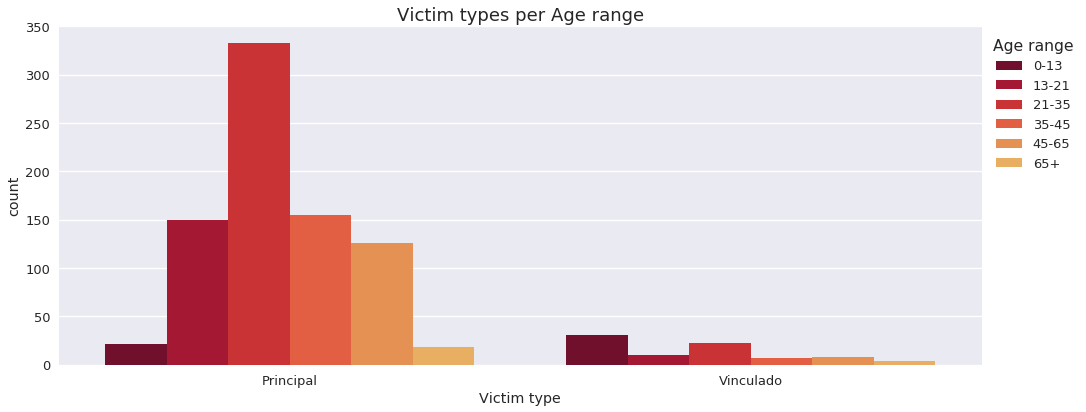

In [72]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.countplot(x='Victim type', hue='Age range', data=df, order=['Principal', 'Vinculado'])
plt.title('Victim types per Age range', fontsize=18)
ax.legend(bbox_to_anchor=(1, 1), loc=2, title='Age range')

fig.tight_layout()

#### Amount of Victim types per Gender identity

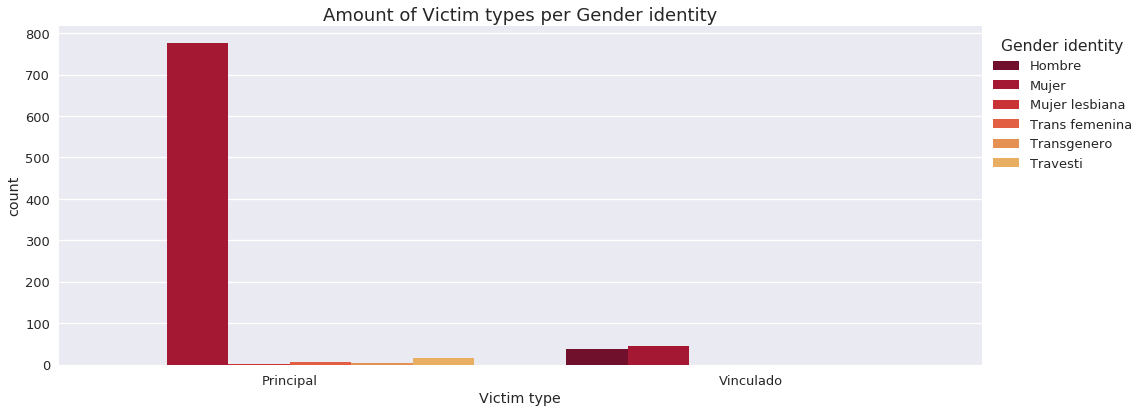

In [73]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.countplot(x='Victim type', hue='Gender identity', data=df, order=['Principal', 'Vinculado'])
plt.title('Amount of Victim types per Gender identity', fontsize=18)
ax.legend(bbox_to_anchor=(1, 1), loc=2, title='Gender identity')

fig.tight_layout()

#### Amount of Victim types per Province

[Text(0.5,27.9,'Victim type'),
 Text(0.5,1,'Amount of cases by Victim types per Province')]

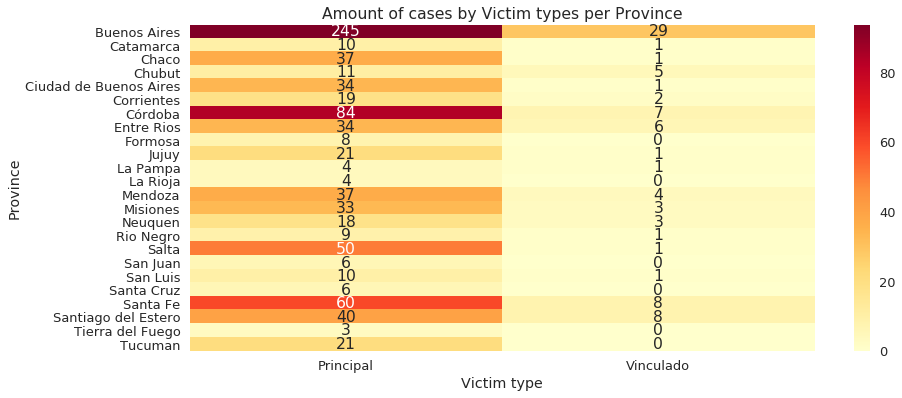

In [74]:
V_P = df.groupby(['Province', 'Victim type'])[['Victim type']].count().unstack()
V_P = V_P.fillna(0)
x_ticks = ['Principal', 'Vinculado']
ax_V_P = sns.heatmap(V_P,cmap="YlOrRd", annot=True, fmt='.0f', robust=True, xticklabels=x_ticks)
ax_V_P.set(title='Amount of cases by Victim types per Province', xlabel='Victim type')

#### Amount of cases by Age range per Day of week

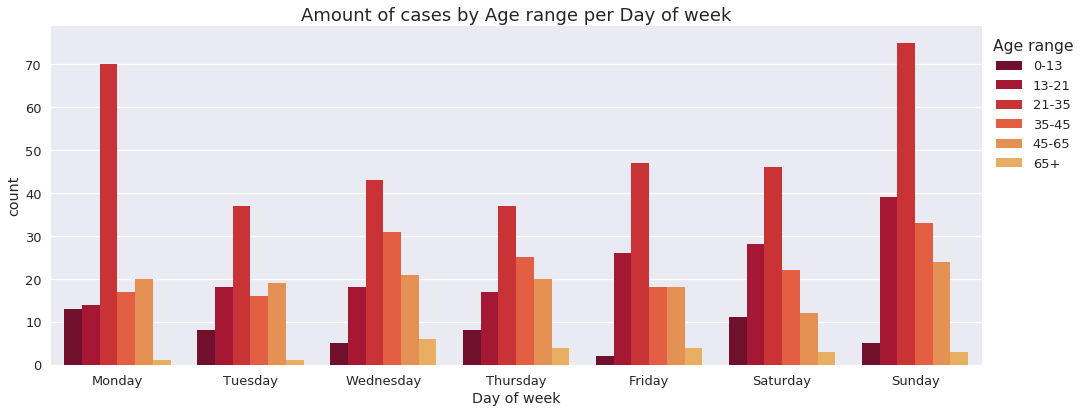

In [75]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.countplot(x='Day of week', hue='Age range', data=df, ax=ax, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.set_title('Amount of cases by Age range per Day of week', fontsize=18)
ax.legend(bbox_to_anchor=(1, 1), loc=2, title='Age range')

fig.tight_layout()

#### Mean Ages per Province

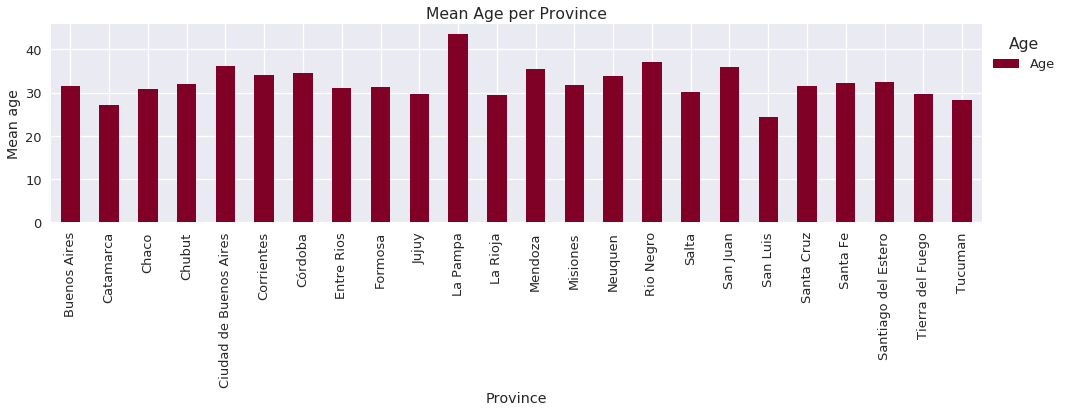

In [76]:
fig, ax = plt.subplots(figsize=(14, 6))

df.groupby(df['Province'])['Age'].mean().plot.bar()

# Creates labels
ax.set_xlabel('Province')
ax.set_ylabel('Mean age')
# Sets the plot title
ax.set_title("Mean Age per Province")
ax.legend(bbox_to_anchor=(1, 1), loc=2, title='Age')

fig.tight_layout()